In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#Load the dataframe

df = pd.read_csv('../data/measurements.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [3]:
#Clean the dataframe

df['distance'] = df['distance'].str.replace(',', '.')
df['consume'] = df['consume'].str.replace(',', '.')
df['temp_inside'] = df['temp_inside'].str.replace(',', '.')
df['refill liters'] = df['refill liters'].str.replace(',', '.')

df['distance']=df['distance'].astype(float)
df['consume']=df['consume'].astype(float)
df['temp_inside']=df['temp_inside'].astype(float)
df['refill liters']=df['refill liters'].astype(float)

#drop some columns 

df= df.drop(columns=['specials','refill liters', 'refill gas'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   376 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   AC            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 27.4+ KB


<Axes: >

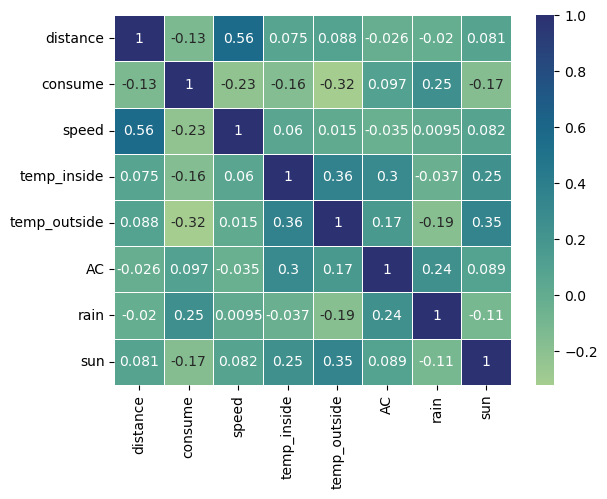

In [5]:
#Correlation matrix

df_num = df.drop(columns=['gas_type'])

sns.heatmap(df_num.corr(), cmap='crest', annot=True, linewidth= 0.5)

In [6]:
#Preprocessing

#Imputer

imputer = IterativeImputer()
df_imp = imputer.fit_transform(df_num)
df_imputed = pd.DataFrame(df_imp)

df_imputed = df_imputed.rename({0:'distance', 1:'consume', 2:'speed', 3:'temp_inside',
                                        4:'temp_outside', 5:'AC', 6:'rain',7:'sun'}, axis=1)

df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    float64
 3   temp_inside   388 non-null    float64
 4   temp_outside  388 non-null    float64
 5   AC            388 non-null    float64
 6   rain          388 non-null    float64
 7   sun           388 non-null    float64
dtypes: float64(8)
memory usage: 24.4 KB


In [7]:
#Encoding categorical data

encoder = OrdinalEncoder()

df_cat= df.loc[:,['gas_type']]

df_enc= encoder.fit_transform(df_cat)
df_enc_cat = pd.DataFrame(df_enc)

print('0 is for E10 and 1 is for SP98')

df_imputed.insert(5, 'gas_type', df_enc_cat)

df_imputed.head()

0 is for E10 and 1 is for SP98


,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26.0,21.5,12.0,0.0,0.0,0.0,0.0
1,12.0,4.2,30.0,21.5,13.0,0.0,0.0,0.0,0.0
2,11.2,5.5,38.0,21.5,15.0,0.0,0.0,0.0,0.0
3,12.9,3.9,36.0,21.5,14.0,0.0,0.0,0.0,0.0
4,18.5,4.5,46.0,21.5,15.0,0.0,0.0,0.0,0.0


In [8]:
#Scaler

scaler= StandardScaler()
scaling_df= df_imputed.loc[:,['distance','consume','speed','temp_inside','temp_outside','AC','rain','sun']]
scaled = scaler.fit_transform(scaling_df)

df_scaled = pd.DataFrame(scaled)
df_scaled.insert(5, 'gas_type', df_enc_cat)
df_scaled = df_scaled.rename({0:'distance', 1:'consume', 2:'speed', 3:'temp_inside',
                                        4:'temp_outside', 5:'AC',6:'rain',7:'sun'}, axis=1)

df_scaled

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,0.368714,0.084925,-1.172804,-0.431554,0.091908,0.0,-0.289480,-0.375735,-0.299813
1,-0.338044,-0.690390,-0.878274,-0.431554,0.235123,0.0,-0.289480,-0.375735,-0.299813
2,-0.373381,0.569497,-0.289216,-0.431554,0.521552,0.0,-0.289480,-0.375735,-0.299813
3,-0.298288,-0.981133,-0.436480,-0.431554,0.378338,0.0,-0.289480,-0.375735,-0.299813
4,-0.050923,-0.399647,0.299843,-0.431554,0.521552,0.0,-0.289480,-0.375735,-0.299813
...,...,...,...,...,...,...,...,...,...
383,-0.161354,-1.174961,-0.215583,2.586019,0.951196,1.0,-0.289480,-0.375735,-0.299813
384,-0.156937,-0.593475,-0.289216,3.088948,2.812986,1.0,3.454466,-0.375735,-0.299813
385,-0.161354,-1.078047,0.226211,3.088948,1.094411,1.0,-0.289480,-0.375735,-0.299813
386,-0.187858,-0.302732,0.005314,3.088948,2.812986,1.0,3.454466,-0.375735,-0.299813


In [9]:
#train test split

X= df_scaled.loc[:,['distance','speed','temp_inside','temp_outside','gas_type','AC','rain','sun']]
y= df_scaled.loc[:,['consume']]

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42, train_size = 0.8)



In [10]:
#Model

regressor = LinearRegression()

regressor.fit(X_train, y_train)
y_pred= regressor.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)

print('RMSE:',rmse)

RMSE: 0.7729588298364193


In [12]:
#Consume on diferrent gas types

y_sp98 = regressor.predict(X_test[X_test.loc[:,'gas_type']==1])
y_E10 = regressor.predict(X_test[X_test.loc[:,'gas_type']==0])

y_sp98.mean() 
y_E10.mean()
diff_in_fuel_100km = y_E10.mean() - y_sp98.mean() 
print('diferrence in fuel consume:',diff_in_fuel_100km)

0.10563934846096194


In [13]:
#Difference cost on gas type

e10_100km = y_E10.mean() * 1.38
sp98_100km = y_sp98.mean() * 1.46

cost_diff = e10_100km - sp98_100km

print('Difference on cost:', cost_diff)

Difference on cost: 0.14405578661749402


In [14]:
#Insights

print('''
The consume on E10 seems more elevated than SP98.

For example,E10 takes 0.10 liters more per 100kms than sp98
and for a 100km drive e10 costs more than sp98 (0.14)
''')


The consume on E10 seems more elevated than SP98.

For example,E10 takes 0.10 liters more per 100kms than sp98
and for a 100km drive e10 costs more than sp98 (0.14)

